#Implementation of Adaline Algorithm to predict the weights of Wild Australian Rabbit eye lenses from their age.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def adaline(X, y, learning_rate=0.001, epochs=100):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0
    mse_values = []

    for _ in range(epochs):
        # Compute predicted output
        predicted = np.dot(X, weights) + bias

        # Calculate error
        error = y - predicted

        # Update weights and bias using gradient descent
        weights += learning_rate * np.dot(X.T, error)
        bias += learning_rate * np.sum(error)

        # Calculate Mean Squared Error (MSE)
        mse = np.mean((error ** 2))
        mse_values.append(mse)

    return mse_values, weights

In [5]:
# Import data
data = np.loadtxt("rabbit_data.txt")
X = data[:, 0][..., None]  # Age of rabbits
y = data[:, 1]

In [ ]:
# Normalize the data
X_normalized = (X - X.mean()) / X.std()
y_normalized = (y - y.mean()) / y.std()

# Add bias term to X
X_with_bias = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

In [ ]:
# Train the Adaline model
mse_values, weights = adaline(X_with_bias, y_normalized)

# Print MSE and weights
print("Final Mean Squared Error (MSE):", mse_values[-1])
print("Final Weights:", weights)

Final Mean Squared Error (MSE): 0.23950419235669745
Final Weights: [-2.15383267e-17  8.71512080e-01]


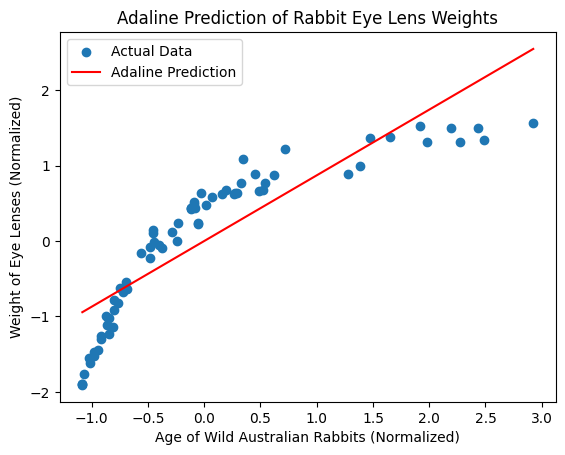

In [ ]:
# Visualize the data and model
plt.scatter(X_normalized, y_normalized, label='Actual Data')
plt.plot(X_normalized, np.dot(X_with_bias, weights), color='red', label='Adaline Prediction')
plt.xlabel('Age of Wild Australian Rabbits (Normalized)')
plt.ylabel('Weight of Eye Lenses (Normalized)')
plt.title('Adaline Prediction of Rabbit Eye Lens Weights')
plt.legend()
plt.show()

The prediction result is not good enough, even though the MSE - 0.2395 is low. The prediction rely a lot on the bias term (8.71512080e-01) instead of the input weight (-2.15383267e-17) for its prediction. Also the visualization shows that the data is non-linear while the prediction model is linear (Adaline)

#Implementation of a prediction algorithm using multi-layer neural network to predict the weights of Wild Australian Rabbit eye lenses from their age

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [45]:
#Create Separate Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Scaling the data for better performance of the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
model = MLPRegressor(hidden_layer_sizes=(150), activation='relu', solver='adam',)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=150)

In [48]:
#Evaluate Performance
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 4200.50085023733
Test MSE: 2289.321354746583


This model does not seem to be better than the adaline, its MSE is way too high in comparison Adaline.

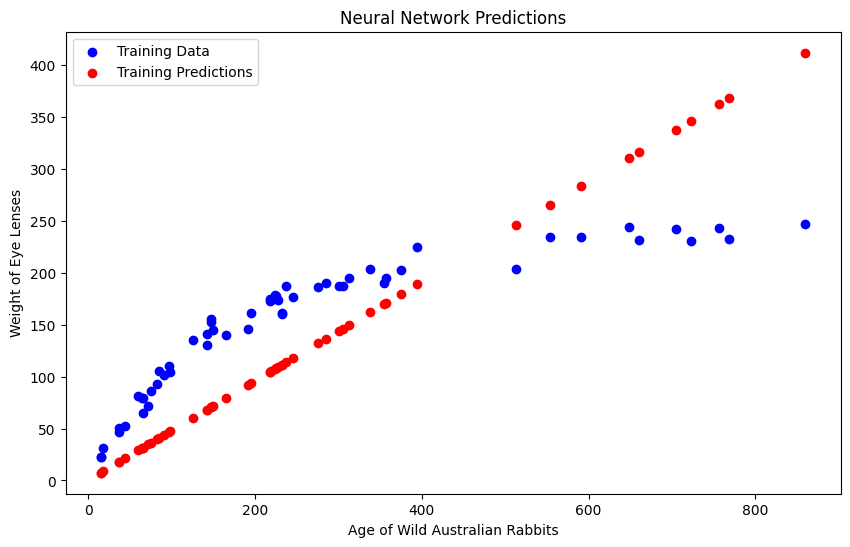

In [49]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_train, train_predictions, color='red', label='Training Predictions')
plt.xlabel('Age of Wild Australian Rabbits')
plt.ylabel('Weight of Eye Lenses')
plt.title('Neural Network Predictions')
plt.legend()
plt.show()

In [50]:
# Define the non-linear regression model function
def non_linear_regression(X):
    return 233.836 * (1 - np.exp(-0.00604 * X))

# Calculate non-linear regression predictions
y_non_linear = non_linear_regression(X)

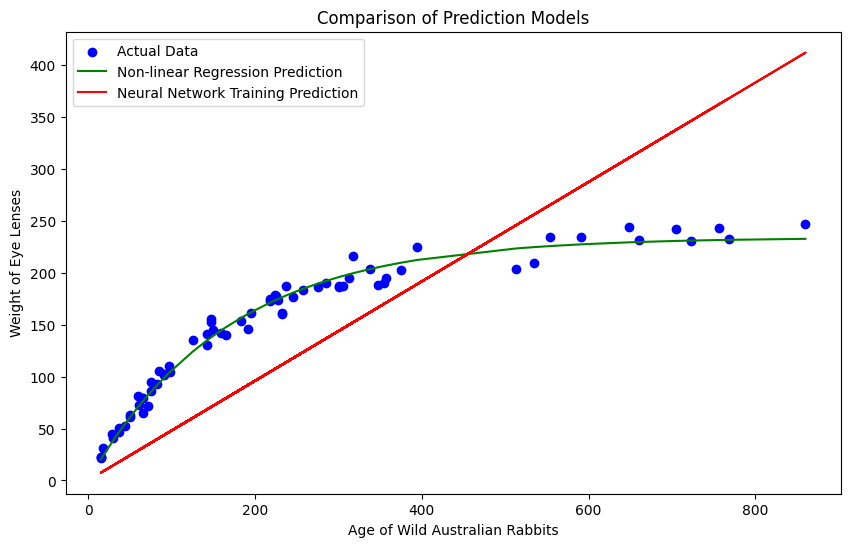

In [51]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_non_linear, color='green', label='Non-linear Regression Prediction')
plt.plot(X_train, train_predictions, color='red', label='Neural Network Training Prediction')
plt.xlabel('Age of Wild Australian Rabbits')
plt.ylabel('Weight of Eye Lenses')
plt.title('Comparison of Prediction Models')
plt.legend()
plt.show()

The non-linear regression model is better, because it is able to learn the non-linear characteristics of the data.

In [52]:
# Overfitting example
overfit_model = MLPRegressor(hidden_layer_sizes=(200, 200, 200),  random_state=42, max_iter=1000)
overfit_model.fit(X_train_scaled, y_train)

# Underfitting example
underfit_model = MLPRegressor(hidden_layer_sizes=(5,), random_state=42)
underfit_model.fit(X_train_scaled, y_train)

# Predictions
overfit_train_predictions = overfit_model.predict(X_train_scaled)
overfit_test_predictions = overfit_model.predict(X_test_scaled)
underfit_train_predictions = underfit_model.predict(X_train_scaled)
underfit_test_predictions = underfit_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


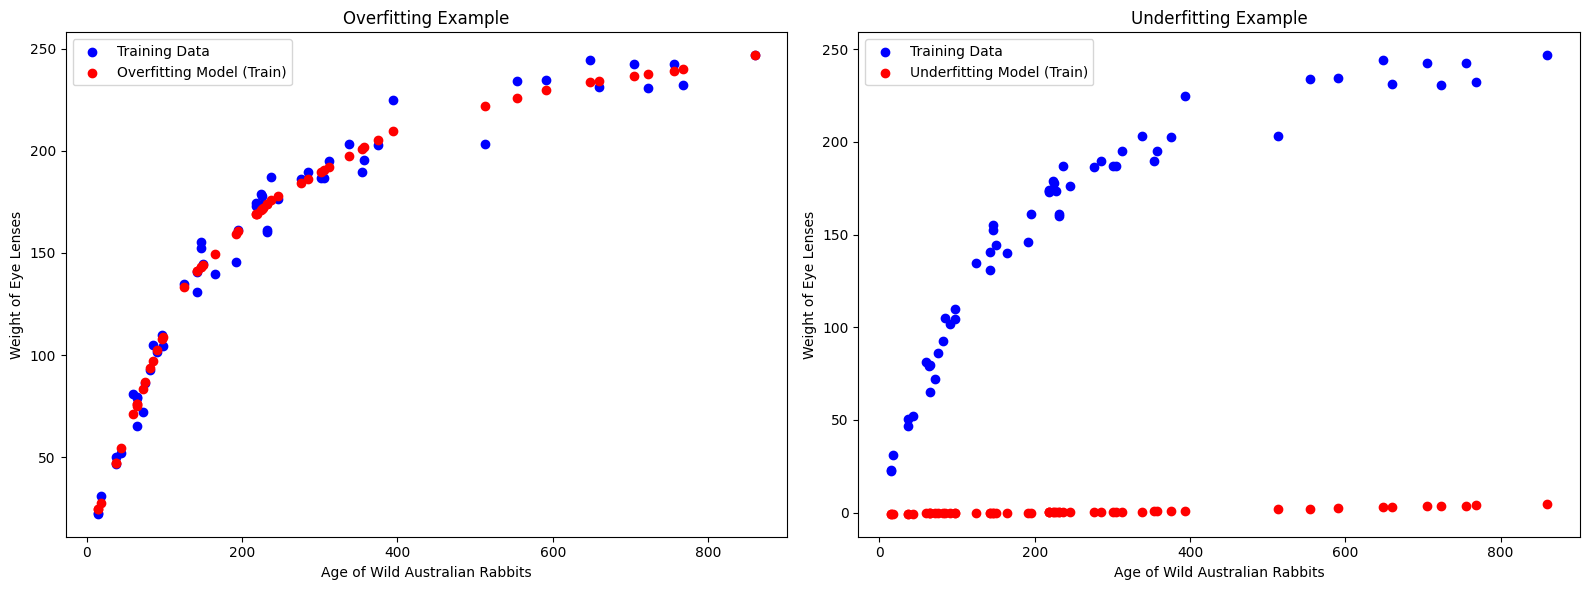

In [53]:
# Plot predictions
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_train, overfit_train_predictions, color='red', label='Overfitting Model (Train)')
plt.xlabel('Age of Wild Australian Rabbits')
plt.ylabel('Weight of Eye Lenses')
plt.title('Overfitting Example')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_train, underfit_train_predictions, color='red', label='Underfitting Model (Train)')
plt.xlabel('Age of Wild Australian Rabbits')
plt.ylabel('Weight of Eye Lenses')
plt.title('Underfitting Example')
plt.legend()

plt.tight_layout()
plt.show()

In [54]:
# Normalize the data
X_normalized = (X - X.mean()) / X.std()
y_normalized = (y - y.mean()) / y.std()

In [55]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Train the neural network
model = MLPRegressor(hidden_layer_sizes=(150,), activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(150,), random_state=42)

In [56]:
# Evaluate performance of neural network
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Neural Network Train MSE with Normalization:", train_mse)
print("Neural Network Test MSE with Normalization:", test_mse)

Neural Network Train MSE with Normalization: 0.034619233884187584
Neural Network Test MSE with Normalization: 0.03969013129169321


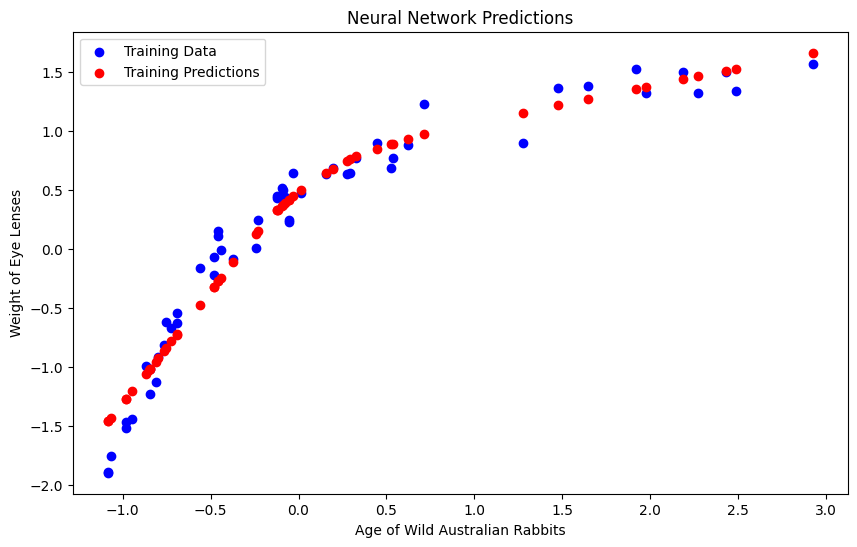

In [57]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_train, train_predictions, color='red', label='Training Predictions')
plt.xlabel('Age of Wild Australian Rabbits')
plt.ylabel('Weight of Eye Lenses')
plt.title('Neural Network Predictions')
plt.legend()
plt.show()